# Lecture 5-2 : Data Wragling

* You will learn how to work with messy data: extract, clean, and deal with invalid or missing values. 
* Data manipulation using Pandas and other Python packages

In [45]:
import pandas as pd
import numpy as np

## 1. Missing data

* Missing data is common in most data analysis applications.
* Pandas uses the floating point value NaN (Not a Number) to represent missing data in both floating as well as in non-floating point arrays.

In [49]:
df_BM = pd.read_csv('./bigmart_data.csv')

In [51]:
df_BM.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [15]:
df_BM.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [19]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [17]:
import missingno as msno

<Axes: >

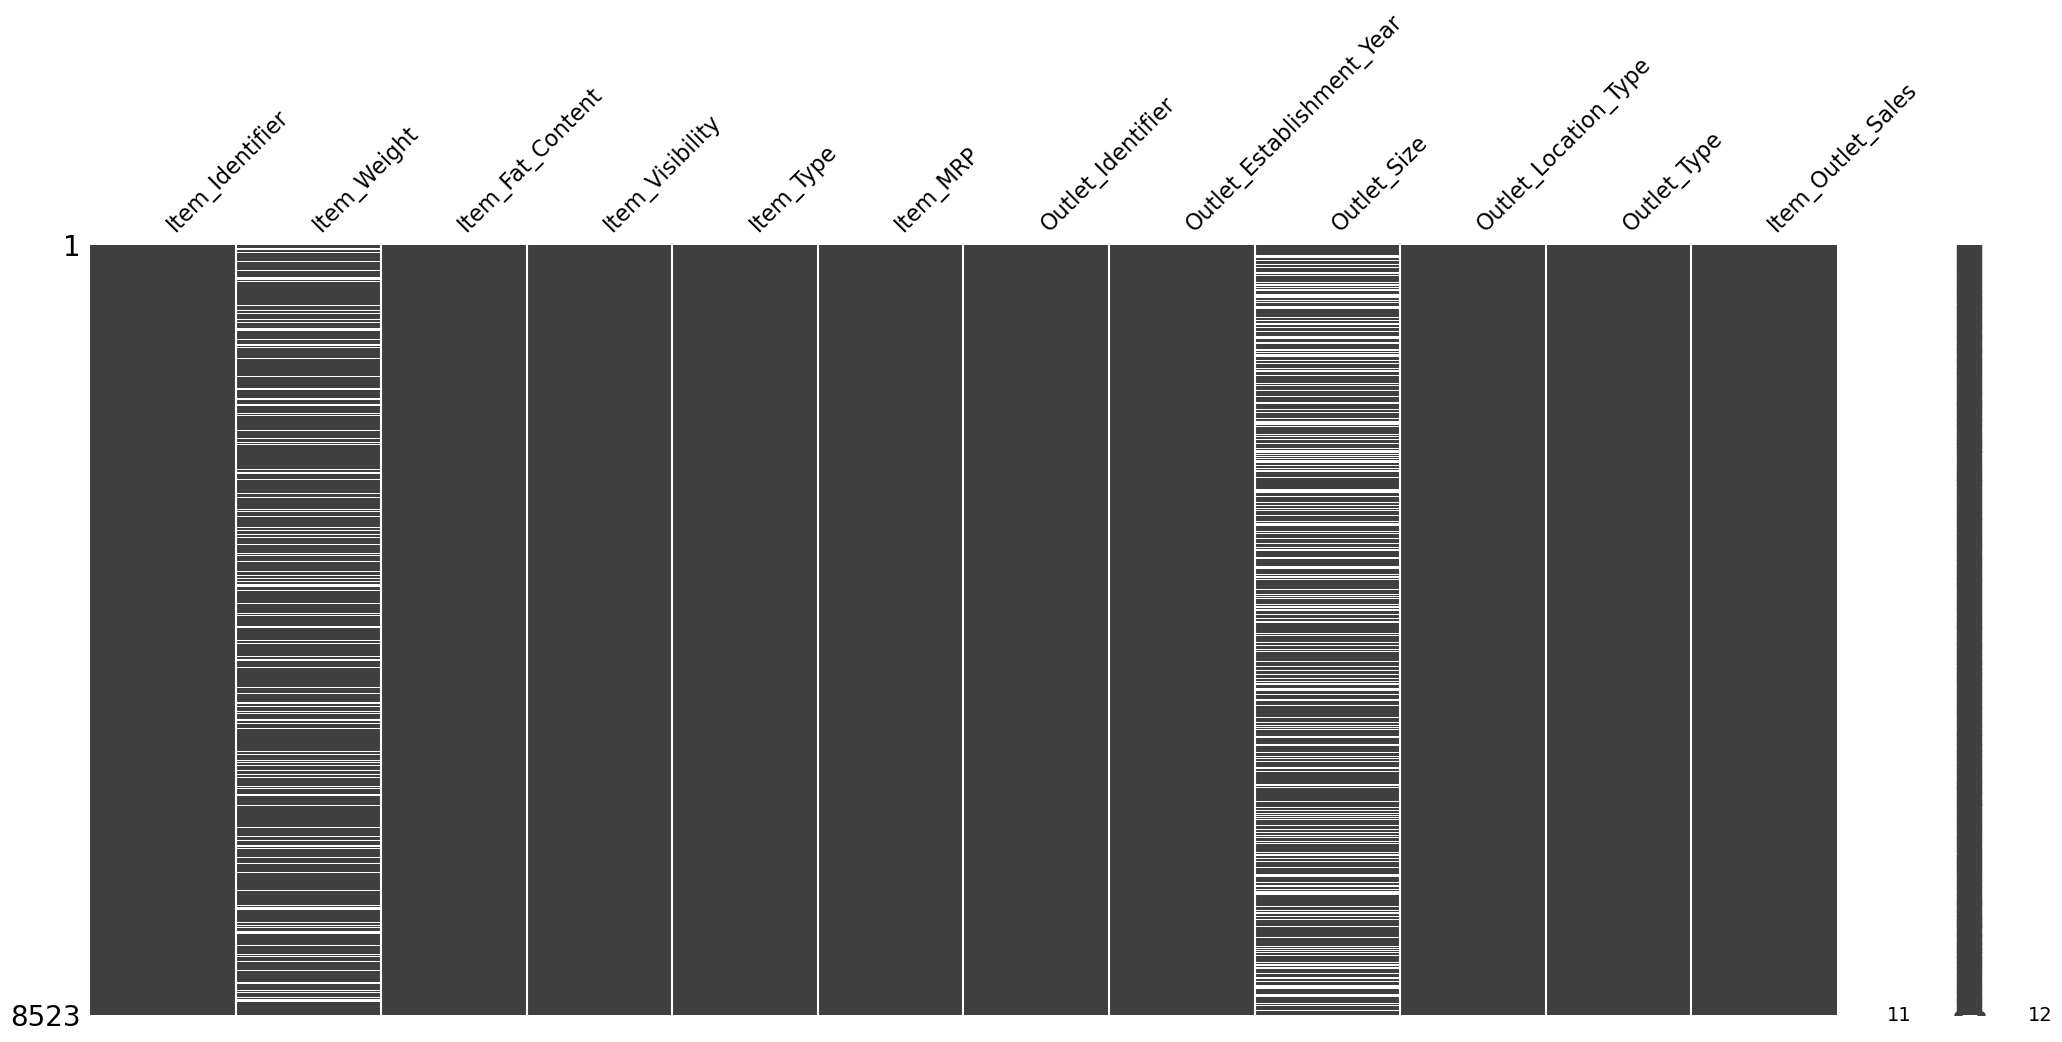

In [21]:
msno.matrix(df_BM)

<Axes: >

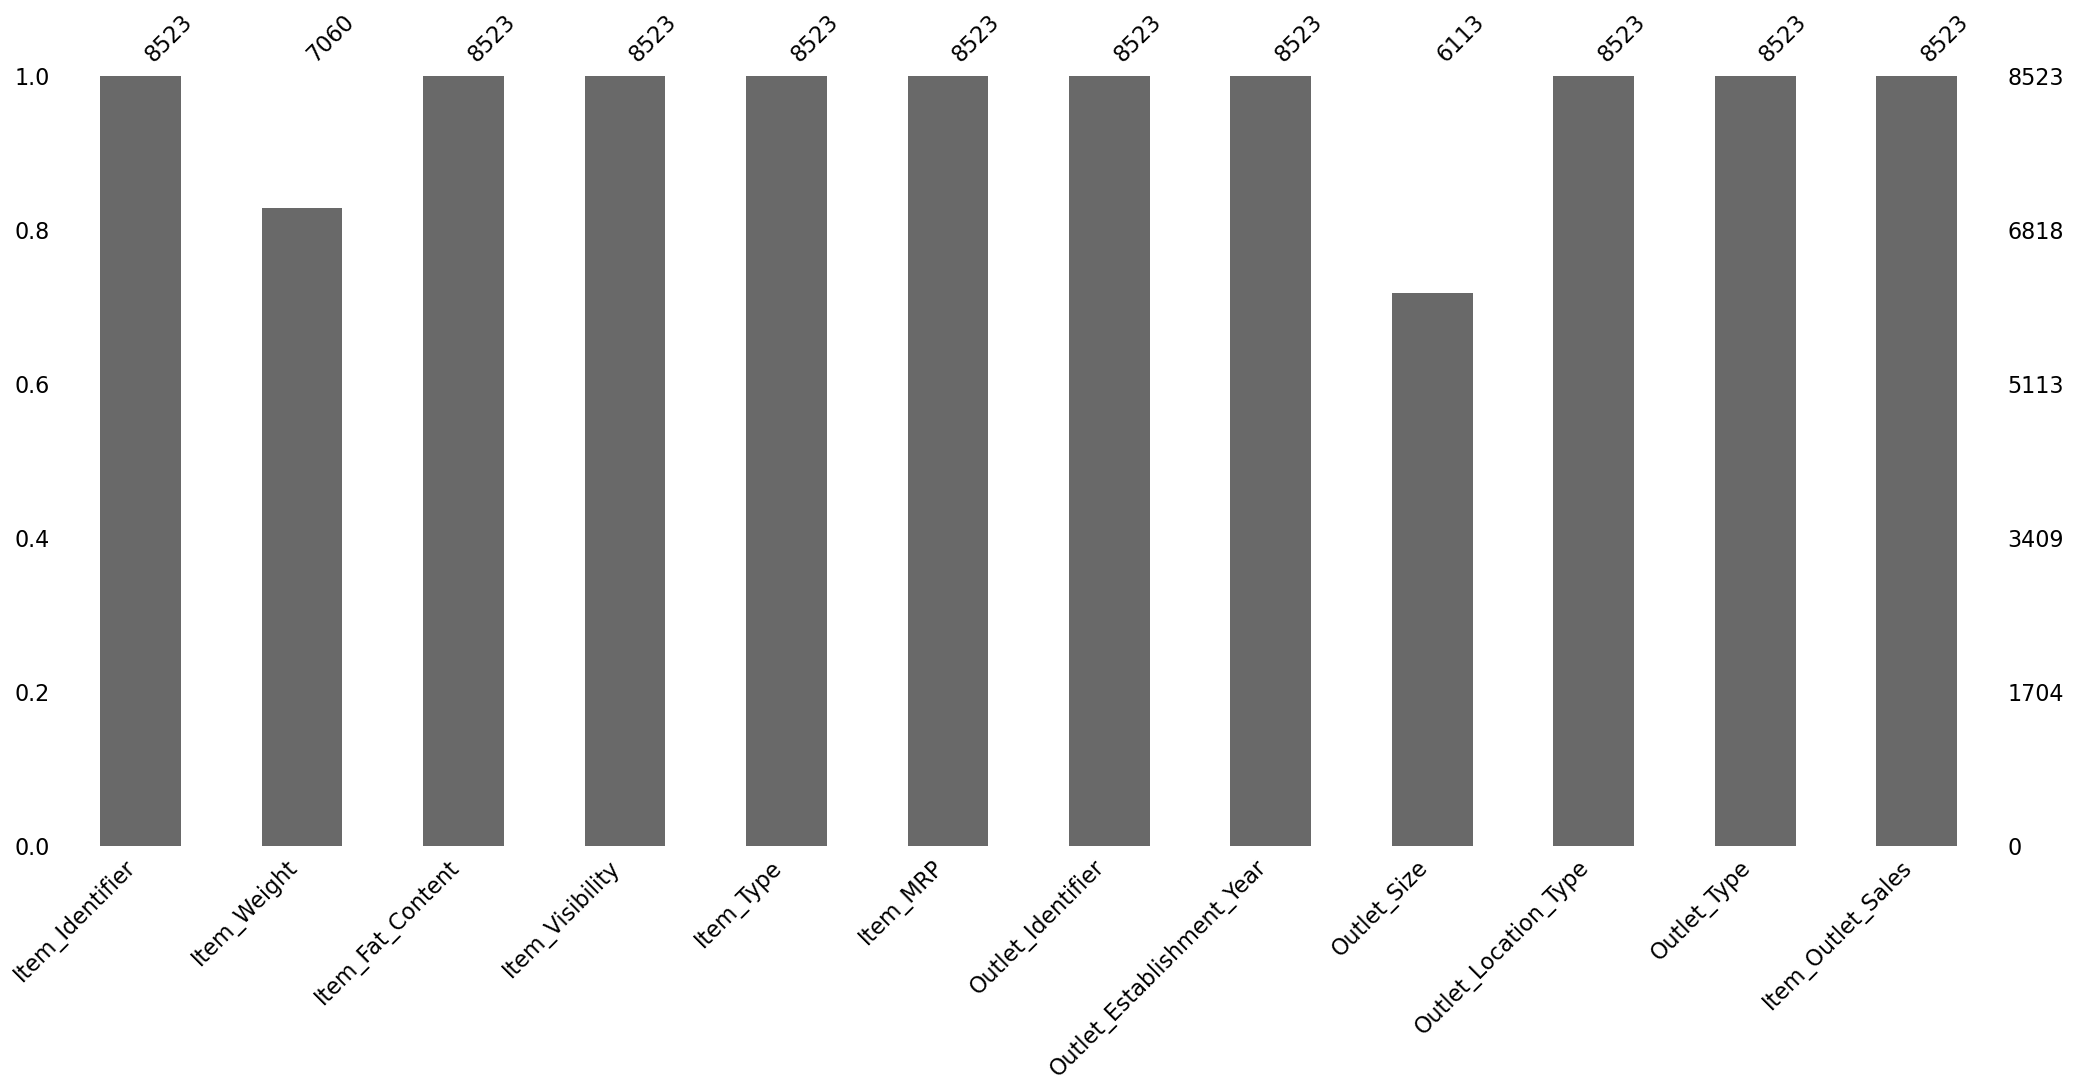

In [23]:
msno.bar(df_BM)

### Filtering out missing data

* With DataFrame objects, you may want to drop rows or columns which are all NA or just those containing any NAs.
* **dropna** by default drops any row containing a missing value.

In [27]:
df_BM.dropna()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


### Filling in missing data

* Rather than filtering out missing data, you may want to fill in the “holes” in any number of ways.
* Calling fillna with a constant replaces missing values with that value.

In [29]:
df_BM.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


* Calling **fillna** with a dict you can use a different fill value for each column.

In [31]:
df_BM.fillna(0).head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,0,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,0.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,0,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,0,Tier 2,Supermarket Type1,4710.5350


In [41]:
df_BM2 = df_BM.fillna({"Item_Weight":0, "Outlet_Size":"no"})

In [43]:
df_BM.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,no,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,0.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,no,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,no,Tier 2,Supermarket Type1,4710.5350


## 2. Merging data

* Merge or join operations combine data sets by linking rows using one or more keys.

In [53]:
df1 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df2 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
# from Python Data Science Handbook: https://www.oreilly.com/library/view/python-data-science/9781491912126/

In [55]:
df1

,name,food
0,Peter,fish
1,Paul,beans
2,Mary,bread


In [57]:
df2

,name,drink
0,Mary,wine
1,Joseph,beer


* By default merge does an **inner** join.

In [59]:
pd.merge(df1, df2, on='name')

,name,food,drink
0,Mary,bread,wine


* Other possible options are **left**, **right**, and **outer**.

In [63]:
pd.merge(df1, df2, on='name', how='outer')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine
3,Joseph,NaN,beer


In [67]:
df1

,name,food
0,Peter,fish
1,Paul,beans
2,Mary,bread


In [71]:
pd.merge(df1, df2, on='name', how='right')

,name,food,drink
0,Mary,bread,wine
1,Joseph,NaN,beer


In [69]:
df2

,name,drink
0,Mary,wine
1,Joseph,beer


### Concatenating along an axis

* Calling **concat** with these object in a list glues together the values and indexes:

In [73]:
df3 = pd.merge(df1, df2, on='name', how='outer')

In [75]:
df3

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine
3,Joseph,NaN,beer


In [77]:
df4 = pd.DataFrame({'name': ['Groot', 'Thor'],
                    'food': [np.nan, 'ice cream'],
                   'drink': ['water', 'beer']},
                   columns=['name', 'food', 'drink'])

In [79]:
df4

,name,food,drink
0,Groot,NaN,water
1,Thor,ice cream,beer


In [85]:
pd.concat([df3, df4]).reset_index(drop=True)

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine
3,Joseph,NaN,beer
4,Groot,NaN,water
5,Thor,ice cream,beer




## 3. Data Transformation
### Removing duplicates

* Duplicate rows may be found in a DataFrame for any number of reasons.
* **drop_duplicates** returns a DataFrame where the duplicated array is True:

In [87]:
df_stock = pd.read_csv('./stock_domestic.csv')

In [91]:
df_stock.head()

,티커,회사명,시가,고가,저가,종가,거래량,등락률,시장
0,060310,3S,1578,1592,1548,1561,"194,289",-1.89,코스닥
1,095570,AJ네트웍스,4590,4630,4560,4620,"70,335",1.43,코스피
2,006840,AK홀딩스,8320,8350,8080,8080,"12,868",-1.58,코스피
3,054620,APS,3790,3940,3710,3770,"15,200",1.89,코스닥
4,265520,AP시스템,19570,19700,18890,19000,"119,396",-3.11,코스닥


In [95]:
df_stock['시장'].drop_duplicates()

0     코스닥
1     코스피
61    코넥스
Name: 시장, dtype: object

### Transforming data using a function or mapping

* For many data sets, you may wish to perform some transformation based on the values in an array, Series, or column in a DataFrame.

In [97]:
market_to_code = {'코스피':0, '코스닥':1, '코넥스':2}

* Using **map** is a convenient way to perform element-wise transformations and other data cleaning-related operations.

In [99]:
df_stock['시장코드'] = df_stock['시장'].map(market_to_code)

In [101]:
df_stock

,티커,회사명,시가,고가,저가,종가,거래량,등락률,시장,시장코드
0,060310,3S,1578,1592,1548,1561,"194,289",-1.89,코스닥,1
1,095570,AJ네트웍스,4590,4630,4560,4620,"70,335",1.43,코스피,0
2,006840,AK홀딩스,8320,8350,8080,8080,"12,868",-1.58,코스피,0
3,054620,APS,3790,3940,3710,3770,"15,200",1.89,코스닥,1
4,265520,AP시스템,19570,19700,18890,19000,"119,396",-3.11,코스닥,1
...,...,...,...,...,...,...,...,...,...,...
2864,000540,흥국화재,3430,3480,3395,3405,"40,624",-0.44,코스피,0
2865,000545,흥국화재우,7090,7270,7080,7270,"2,302",2.54,코스피,0
2866,003280,흥아해운,1553,1605,1553,1603,"928,194",2.17,코스피,0
2867,037440,희림,4255,4360,4150,4340,"42,669",2.00,코스닥,1


### Replacing values

* **replace** provides a simpler and more flexible way to replace values.

In [105]:
df_stock.replace('코스피', 'KOSPI')

,티커,회사명,시가,고가,저가,종가,거래량,등락률,시장,시장코드
0,060310,3S,1578,1592,1548,1561,"194,289",-1.89,코스닥,1
1,095570,AJ네트웍스,4590,4630,4560,4620,"70,335",1.43,KOSPI,0
2,006840,AK홀딩스,8320,8350,8080,8080,"12,868",-1.58,KOSPI,0
3,054620,APS,3790,3940,3710,3770,"15,200",1.89,코스닥,1
4,265520,AP시스템,19570,19700,18890,19000,"119,396",-3.11,코스닥,1
...,...,...,...,...,...,...,...,...,...,...
2864,000540,흥국화재,3430,3480,3395,3405,"40,624",-0.44,KOSPI,0
2865,000545,흥국화재우,7090,7270,7080,7270,"2,302",2.54,KOSPI,0
2866,003280,흥아해운,1553,1605,1553,1603,"928,194",2.17,KOSPI,0
2867,037440,희림,4255,4360,4150,4340,"42,669",2.00,코스닥,1


* The argument passed can also be a dictionary:

In [111]:
df_stock.replace({"코스피":"KOSPI", "코스닥":"KOSDAQ", "코넥스":"KONEX"}, inplace=True)

In [113]:
df_stock.head()

,티커,회사명,시가,고가,저가,종가,거래량,등락률,시장,시장코드
0,060310,3S,1578,1592,1548,1561,"194,289",-1.89,KOSDAQ,1
1,095570,AJ네트웍스,4590,4630,4560,4620,"70,335",1.43,KOSPI,0
2,006840,AK홀딩스,8320,8350,8080,8080,"12,868",-1.58,KOSPI,0
3,054620,APS,3790,3940,3710,3770,"15,200",1.89,KOSDAQ,1
4,265520,AP시스템,19570,19700,18890,19000,"119,396",-3.11,KOSDAQ,1


### Renaming column names

* Notably, rename can be used in conjunction with a dict-like object providing new values for a subset of the axis labels:

In [119]:
df_stock.head()

,티커,회사명,시가,고가,저가,종가,거래량,등락률,시장,시장코드
0,060310,3S,1578,1592,1548,1561,"194,289",-1.89,KOSDAQ,1
1,095570,AJ네트웍스,4590,4630,4560,4620,"70,335",1.43,KOSPI,0
2,006840,AK홀딩스,8320,8350,8080,8080,"12,868",-1.58,KOSPI,0
3,054620,APS,3790,3940,3710,3770,"15,200",1.89,KOSDAQ,1
4,265520,AP시스템,19570,19700,18890,19000,"119,396",-3.11,KOSDAQ,1


In [117]:
df_stock.rename(columns={"티커":"ticker"})

,ticker,회사명,시가,고가,저가,종가,거래량,등락률,시장,시장코드
0,060310,3S,1578,1592,1548,1561,"194,289",-1.89,KOSDAQ,1
1,095570,AJ네트웍스,4590,4630,4560,4620,"70,335",1.43,KOSPI,0
2,006840,AK홀딩스,8320,8350,8080,8080,"12,868",-1.58,KOSPI,0
3,054620,APS,3790,3940,3710,3770,"15,200",1.89,KOSDAQ,1
4,265520,AP시스템,19570,19700,18890,19000,"119,396",-3.11,KOSDAQ,1
...,...,...,...,...,...,...,...,...,...,...
2864,000540,흥국화재,3430,3480,3395,3405,"40,624",-0.44,KOSPI,0
2865,000545,흥국화재우,7090,7270,7080,7270,"2,302",2.54,KOSPI,0
2866,003280,흥아해운,1553,1605,1553,1603,"928,194",2.17,KOSPI,0
2867,037440,희림,4255,4360,4150,4340,"42,669",2.00,KOSDAQ,1


### Sort values

In [121]:
df_stock = pd.read_csv('./stock_domestic.csv')

In [123]:
df_stock.head()

,티커,회사명,시가,고가,저가,종가,거래량,등락률,시장
0,060310,3S,1578,1592,1548,1561,"194,289",-1.89,코스닥
1,095570,AJ네트웍스,4590,4630,4560,4620,"70,335",1.43,코스피
2,006840,AK홀딩스,8320,8350,8080,8080,"12,868",-1.58,코스피
3,054620,APS,3790,3940,3710,3770,"15,200",1.89,코스닥
4,265520,AP시스템,19570,19700,18890,19000,"119,396",-3.11,코스닥


* Suppose you want to sort the dataframe by "등락률" then you will use **sort_values**

In [125]:
df_stock.sort_values(by='등락률')

,티커,회사명,시가,고가,저가,종가,거래량,등락률,시장
2412,308700,테크엔,98,98,29,29,"6,627",-40.82,코넥스
2075,174880,장원테크,1027,1027,754,754,"535,127",-26.80,코스닥
161,111870,KH 미래물산,630,630,475,475,"899,991",-24.36,코스닥
350,012205,계양전기우,12100,15040,11000,11000,"622,407",-21.43,코스피
121,003560,IHQ,400,407,365,365,"562,132",-16.28,코스피
...,...,...,...,...,...,...,...,...,...
1610,036170,에이치엠넥스,1432,1432,1432,1432,"1,920,055",29.95,코스닥
2513,119500,포메탈,4050,4945,3950,4945,"9,174,052",29.96,코스닥
1460,052770,아이톡시,1065,1071,916,1071,"2,628,482",29.98,코스닥
1996,088290,이원컴포텍,759,988,759,988,"3,204,037",30.00,코스닥


* `ascending`: The default sorting order is ascending, when you pass False here then it sorts in descending order.

In [129]:
df_stock.sort_values(by='등락률', ascending=False)

,티커,회사명,시가,고가,저가,종가,거래량,등락률,시장
1037,266170,뿌리깊은나무들,3420,3420,3420,3420,2,900.00,코넥스
1996,088290,이원컴포텍,759,988,759,988,"3,204,037",30.00,코스닥
1460,052770,아이톡시,1065,1071,916,1071,"2,628,482",29.98,코스닥
2513,119500,포메탈,4050,4945,3950,4945,"9,174,052",29.96,코스닥
1610,036170,에이치엠넥스,1432,1432,1432,1432,"1,920,055",29.95,코스닥
...,...,...,...,...,...,...,...,...,...
121,003560,IHQ,400,407,365,365,"562,132",-16.28,코스피
350,012205,계양전기우,12100,15040,11000,11000,"622,407",-21.43,코스피
161,111870,KH 미래물산,630,630,475,475,"899,991",-24.36,코스닥
2075,174880,장원테크,1027,1027,754,754,"535,127",-26.80,코스닥


* You might want to sort a dataframe based on the values of multiple columns. We can specify the columns we want to sort by as a list in the argument for sort_values().
* Note that when sorting by multiple columns, Pandas sort_values() uses the first variable first and second variable next. 
* We can see the difference by switching the order of column names in the list.

In [139]:
df_stock.sort_values(by=['거래량', '등락률'], ascending=[False, False])

,티커,회사명,시가,고가,저가,종가,거래량,등락률,시장
1728,250930,예선테크,463,477,458,473,"99,950",2.16,코스닥
1607,072990,에이치시티,5510,5790,5510,5730,"99,707",3.80,코스닥
1197,340440,세림B&G,1425,1455,1393,1444,"99,423",1.33,코스닥
1445,461030,아이엠비디엑스,9910,10140,9850,10020,"99,323",0.50,코스닥
157,151860,KG에코솔루션,5220,5320,5200,5250,"99,180",0.57,코스닥
...,...,...,...,...,...,...,...,...,...
2792,016790,현대사료,0,0,0,994,0,0.00,코스닥
2842,298000,효성화학,0,0,0,38900,0,0.00,코스피
1001,191600,블루탑,6540,6540,6540,6540,0,-0.76,코넥스
1526,224810,엄지하우스,2245,2245,2245,2245,0,-1.32,코넥스


## 4. Aggregating

- In the given data set, you may want to find out **what is the mean rate of change of each market**?
- You can use **groupby()** to achieve this.
- The first step would be to group the data by '시장' column.

In [145]:
df_stock.head()

,티커,회사명,시가,고가,저가,종가,거래량,등락률,시장
0,060310,3S,1578,1592,1548,1561,"194,289",-1.89,코스닥
1,095570,AJ네트웍스,4590,4630,4560,4620,"70,335",1.43,코스피
2,006840,AK홀딩스,8320,8350,8080,8080,"12,868",-1.58,코스피
3,054620,APS,3790,3940,3710,3770,"15,200",1.89,코스닥
4,265520,AP시스템,19570,19700,18890,19000,"119,396",-3.11,코스닥


In [155]:
df_stock.groupby('시장')[['등락률','종가']].agg(['mean', 'max', 'min'])

등락률                           종가              
         mean     max    min          mean      max  min
시장                                                      
코넥스  8.342435  900.00 -40.82   5464.208696   122300   29
코스닥  0.638651   30.00 -26.80  12826.300389   511000   93
코스피  0.692267   27.53 -21.43  51849.413431  1885000  147

## Further reading and resources

* Python Data Science Handbook https://www.oreilly.com/library/view/python-data-science/9781491912126/
* Pandas for Everyone https://www.amazon.com/Pandas-Everyone-Analysis-Addison-Wesley-Analytics-ebook/dp/B0789WKTKJ
* Kaggle Courses https://www.kaggle.com/learn/pandas
* W3School tutorial https://www.w3schools.com/python/pandas/default.asp